# Document Chunk Analysis

In [46]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
sns.set_style('whitegrid')

## 1. Load Chunk Data from all files

In [47]:
def load_jsonl(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

dir_path = Path("/Users/munseoghyeon/Desktop/Project/Financial_Document_Analyzer/data/processed/embeddings")
all_chunks = []

for file_path in dir_path.glob("*.jsonl"):
    doc_name = file_path.stem
    chunks_data = load_jsonl(file_path)
    for chunk in chunks_data:
        chunk['source_doc'] = doc_name
        all_chunks.append(chunk)

df = pd.DataFrame(all_chunks)

print(f"Loaded {len(df)} chunks from {len(list(dir_path.glob("*.jsonl")))} documents")
df.head()

Loaded 3329 chunks from 6 documents


,source_doc,doc_id,chunk_id,type,text,page_start,page_end,source_elements,embedding
0,BESTBUY_2024Q2_10Q,BESTBUY_2024Q2_10Q_p1,1,title,UNITED STATES SECURITIES AND EXCHANGE COMMISSION,1,1,[0],"[-0.00020344776567071676, 0.013862824998795986..."
1,BESTBUY_2024Q2_10Q,BESTBUY_2024Q2_10Q_p1,2,text,"Washington, D.C. 20549",1,1,[1],"[0.00019654491916298866, -0.029192432761192322..."
2,BESTBUY_2024Q2_10Q,BESTBUY_2024Q2_10Q_p1,3,title,FORM 10 Q,1,1,[2],"[-0.00031677965307608247, -0.00178458995651453..."
3,BESTBUY_2024Q2_10Q,BESTBUY_2024Q2_10Q_p1,4,title,(Mark One),1,1,[3],"[3.5993740311823785e-05, -0.02499297820031643,..."
4,BESTBUY_2024Q2_10Q,BESTBUY_2024Q2_10Q_p1,5,text,QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...,1,1,"[4, 5, 6, 7, 8, 9, 10]","[-4.539362998912111e-05, -0.032375749200582504..."


## 2. Analyze Chunk Properties

In [48]:
df['chunk_length_chars'] = df['text'].str.len()
df['chunk_length_chars'].describe()

count    3329.000000
mean      655.874437
std       864.566317
min         1.000000
25%        32.000000
50%       195.000000
75%      1057.000000
max      4960.000000
Name: chunk_length_chars, dtype: float64

## 3. Visualize Chunk Length Distribution (All Documents)

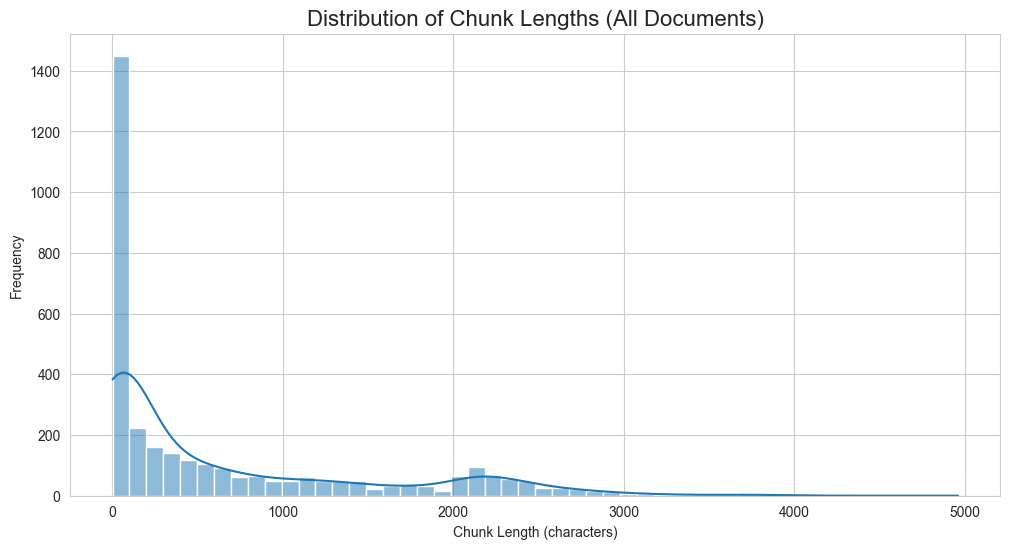

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(df['chunk_length_chars'], bins=50, kde=True)
plt.title('Distribution of Chunk Lengths (All Documents)', fontsize=16)
plt.xlabel('Chunk Length (characters)')
plt.ylabel('Frequency')
plt.show()

## 4. Compare Chunk Lengths by Document

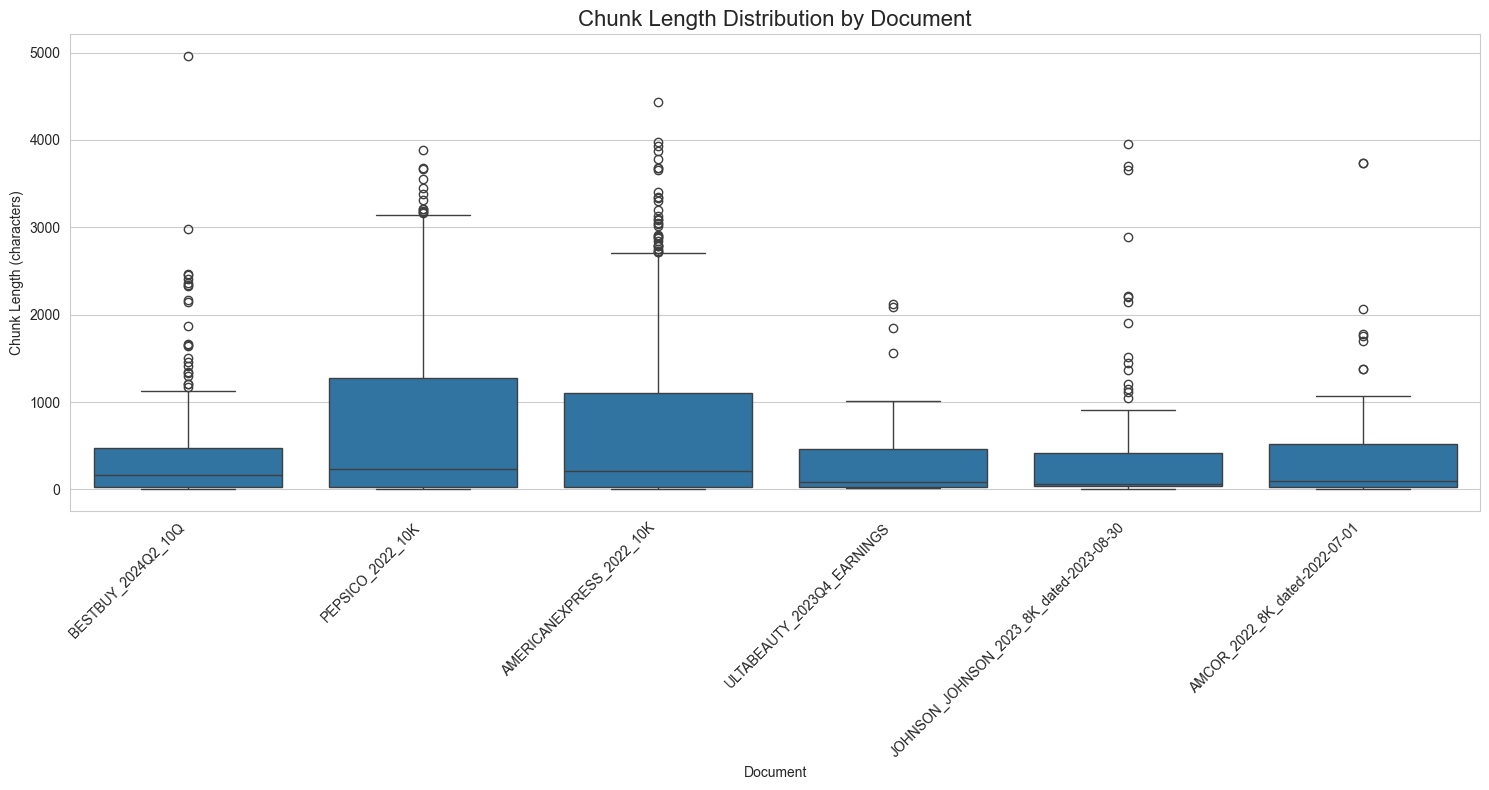

In [50]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='source_doc', y='chunk_length_chars', data=df)
plt.title('Chunk Length Distribution by Document', fontsize=16)
plt.xlabel('Document')
plt.ylabel('Chunk Length (characters)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Analyze Chunk Types (All Documents)

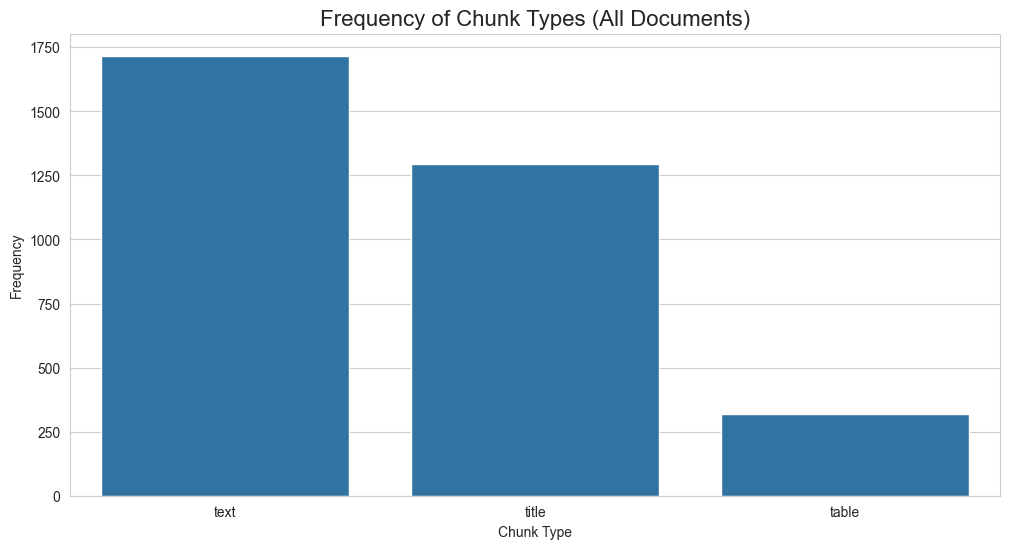

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df, order = df['type'].value_counts().index)
plt.title('Frequency of Chunk Types (All Documents)', fontsize=16)
plt.xlabel('Chunk Type')
plt.ylabel('Frequency')
plt.show()

## 6. Analyze Chunk Types by Document

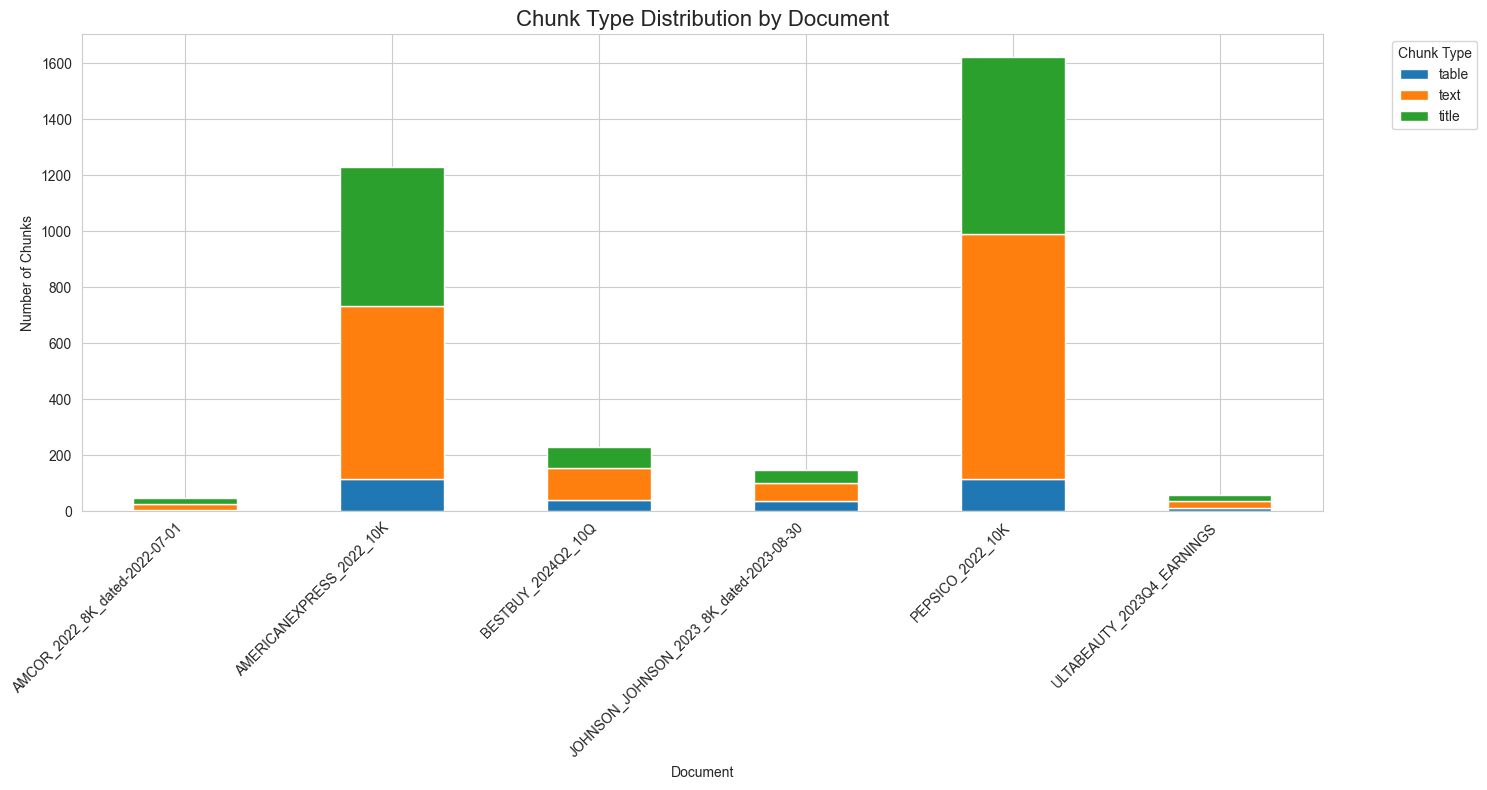

In [52]:
chunk_type_by_doc = df.groupby(['source_doc', 'type']).size().unstack(fill_value=0)
chunk_type_by_doc.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Chunk Type Distribution by Document', fontsize=16)
plt.xlabel('Document')
plt.ylabel('Number of Chunks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Chunk Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()